In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import networkx as nx

from neuprint import Client

from config import conf
from dataset_utils import fetch_adjacency, fetch_rois_from_metadata, fetch_rois_from_df, fetch_primary_roi_datasets
from basic_metrics import indegree_mean,outdegree_mean

from fh import flow_hierarchy
from utils import conn2adj
from config import conf


<h1>primary_rois</h1>

In [2]:
c = Client(conf.neuprint_URL, conf.dataset_version)


In [3]:
empty_rois = fetch_primary_roi_datasets(client=c)

dataset in adjpath= datasets/noncropped_traced_ME(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AME(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_LO(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_LOP(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_CA(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_CA(L)
downloading dataset
NeuronCriteria("n", status="Traced", cropped=False)
download problem, skipping
dataset in adjpath= datasets/noncropped_traced_PED(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_a'L(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_a'L(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_aL(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_aL(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_tra

In [4]:
_, primary_rois, _, toplevel_rois = fetch_rois_from_metadata(client=c)


In [5]:
results = pd.DataFrame(data=primary_rois,columns=['primary_roi'])

#basic/local metrics
results = pd.concat([results,pd.Series([],name='number_neurons',dtype=np.int)],axis=1)
results = pd.concat([results,pd.Series([],name='number_synapses',dtype=np.int)],axis=1)
results = pd.concat([results,pd.Series([],name='indegree_mean',dtype=np.float)],axis=1)
results = pd.concat([results,pd.Series([],name='outdegree_mean',dtype=np.float)],axis=1)

# results = pd.concat([results,pd.Series([],name='katz_centrality',dtype=np.float)],axis=1)
# results = pd.concat([results,pd.Series([],name='',dtype=np.float)],axis=1)

#global metrics
results = pd.concat([results,pd.Series([],name='recurrence',dtype=np.float)],axis=1)
results = pd.concat([results,pd.Series([],name='flow_hierarchy',dtype=np.float)],axis=1)


In [6]:
results_fh_cols = ['fh','fh_randomwire_mean','fh_randomwire_std','fh_randomweight_mean','fh_randomweight_std']
results_fh = pd.DataFrame(data=primary_rois,columns=['primary_roi'])
for col in results_fh_cols:
    results_fh = pd.concat([results_fh,pd.Series([],name=col,dtype=np.float)],axis=1)

In [41]:
#load flow_hierarchy
for i,rec in results.iterrows():
    try:
        roi = rec['primary_roi']
        #print(roi)
        path = os.path.join(conf.results_dir,'primary_roi_fh','roi='+roi+'.txt')
        if os.path.exists(path):
            #print(roi,'result found')
            with open(path,'r') as f:
                s = f.read()
                h,h_randwire_mean,h_randwire_std,h_randweight_mean,h_randweight_std = list(map(float,s.split(' ')))
                results.loc[results['primary_roi']==roi,'flow_hierarchy'] = h
                
                results_fh.loc[results_fh['primary_roi']==roi,'fh'] = h
                results_fh.loc[results_fh['primary_roi']==roi,'fh_randomwire_mean'] = h_randwire_mean
                results_fh.loc[results_fh['primary_roi']==roi,'fh_randomwire_std'] = h_randwire_std
                results_fh.loc[results_fh['primary_roi']==roi,'fh_randomweight_mean'] = h_randweight_mean
                results_fh.loc[results_fh['primary_roi']==roi,'fh_randomweight_std'] = h_randweight_std
        #else:
            #print(roi,'result NOT found')
    except MemoryError:
        print('memory error')
        continue


#load basic quantities
for i,rec in results.iterrows():
    try:
        roi = rec['primary_roi']
        #print(roi)
        #path = os.path.join(conf.results_dir,'flow_hierarchy','fh_roi='+roi+'.txt')
    #         if os.path.exists(path):
    #             with open(path,'r') as f:
    #                 print('result found')
        path = os.path.join(conf.datasets_dir,'noncropped_traced_'+roi)
        if os.path.exists(path):
            n,conn = fetch_adjacency(adjpath=path)
            results.loc[results['primary_roi']==roi,'number_neurons'] = int(n.shape[0])
            results.loc[results['primary_roi']==roi,'number_synapses'] = int(conn.shape[0])
            
#             n,adj = conn2adj(conn)
#             results.loc[results['primary_roi']==roi,'indegree_mean'] = indegree_mean(adj)
#             results.loc[results['primary_roi']==roi,'outdegree_mean'] = outdegree_mean(adj)

    except MemoryError:
        print('memory error')
        continue

dataset in adjpath= datasets/noncropped_traced_PRW
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_a'L(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_aL(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_ME(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_FLA(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AL(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_CAN(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_EPA(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_BU(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AB(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_LOP(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_bL(L)
dataset already downloaded
dataset in adjpath= datasets/noncropp

HTTPError: Error accessing POST https://neuprint.janelia.org/api/custom/custom

Cypher was:

    MATCH (m:Meta)
    WITH m as m,
         apoc.convert.fromJsonMap(m.roiInfo) as roiInfo,
         apoc.convert.fromJsonMap(m.roiHierarchy) as roiHierarchy,
         apoc.convert.fromJsonMap(m.neuroglancerInfo) as neuroglancerInfo,
         apoc.convert.fromJsonList(m.neuroglancerMeta) as neuroglancerMeta,
         apoc.convert.fromJsonMap(m.statusDefinitions) as statusDefinitions
    RETURN m as meta, roiInfo, roiHierarchy, neuroglancerInfo, neuroglancerMeta, statusDefinitions


Returned Error (502)

In [43]:
results = results.sort_values(by='number_synapses')

In [44]:

results.to_csv(os.path.join(conf.results_dir,'results.csv'))

<h3>primary_rois / basic quantities plots</h3>

In [45]:
results.tail()

,primary_roi,number_neurons,number_synapses,indegree_mean,outdegree_mean,recurrence,flow_hierarchy
28,AVLP(R),4130.0,247008.0,NaN,NaN,NaN,0.011934
33,SLP(R),5864.0,328826.0,NaN,NaN,NaN,0.024320
17,FB,2537.0,332510.0,NaN,NaN,NaN,0.015989
36,SMP(R),5304.0,366577.0,NaN,NaN,NaN,0.021009
5,CA(L),NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
results_fh.head()

,primary_roi,fh,fh_randomwire_mean,fh_randomwire_std,fh_randomweight_mean,fh_randomweight_std
61,PRW,NaN,NaN,NaN,NaN,NaN
8,a'L(L),0.159292,0.865044,0.213839,0.626106,0.221608
10,aL(L),0.009238,0.298614,0.212035,0.053002,0.031484
0,ME(R),0.784722,0.878125,0.119163,0.843403,0.020184
59,FLA(R),0.602151,0.757930,0.112469,0.644220,0.026818


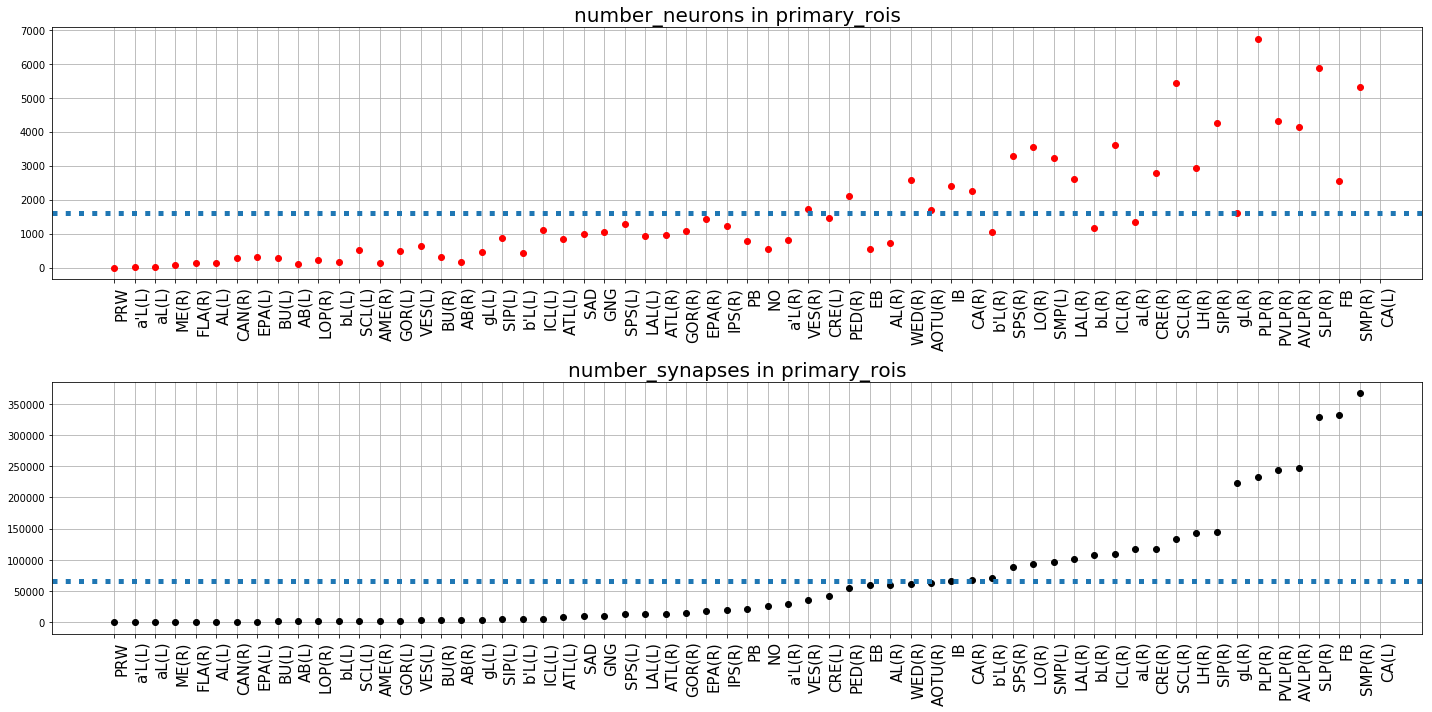

In [11]:
#plot basic quantities

fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(20,10))

cols = ['number_neurons','number_synapses','indegree_mean','outdegree_mean']
styles = ['ro','ko']
for i,ax,col in zip(range(len(axs)),axs,cols):
    #t = rois[plot_list].to_numpy()
    #plt.imshow(t,cmap='gray')
    ax.plot(results[col].values,styles[i])

    ax.grid(True)
    ax.axhline(results[col].mean(),linestyle=':',linewidth=5)
    # for i in range(len(rois['combined_rois'])):
    #     ax.axhline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
    # for i in range(5):
    #     ax.axvline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
    # ax.set_aspect(1/5)
    ax.set_ylabel('',fontsize=15)
    ax.set_title(col+' in primary_rois',fontsize=20)
    ax.set_xticks([i for i in range(len(primary_rois))])
    ax.set_xticklabels(results['primary_roi'],fontsize=15)
    

    
    # ax.set_xticklabels([0]+plot_list,fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

plt.tight_layout()
plt.show()

<h3>primary_rois / flow_hierarchy plots</h3>

In [47]:
results_fh = results_fh.reindex(results.sort_values(by='number_synapses').index)

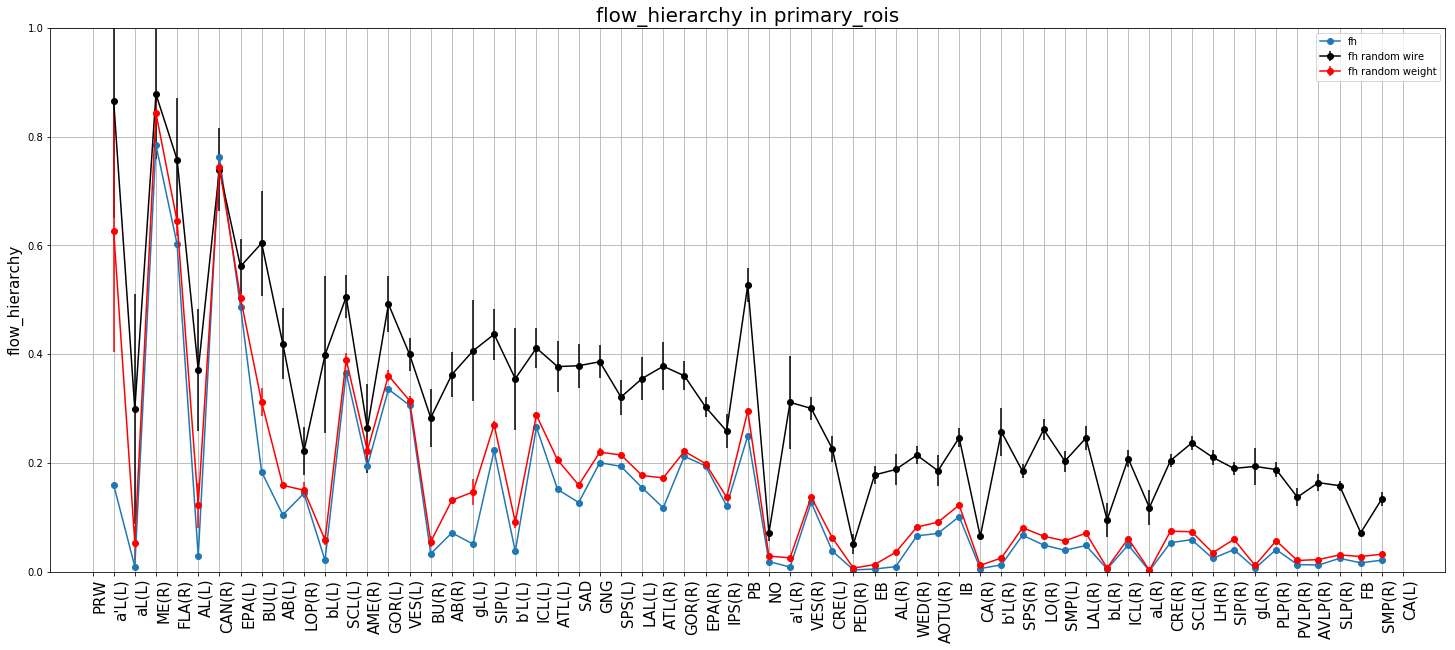

In [48]:
#plot flow_hierarchy

#plot_list = ['all_rois','df_rois','primary_rois','toplevel_rois','nonhierarchy_rois']
fig = plt.figure(figsize=(25,10))
#t = rois[plot_list].to_numpy()
#plt.imshow(t,cmap='gray')
plt.plot(results_fh['fh'].values,'o-',label='fh')
xs = [i for i in range(results_fh.shape[0])]
plt.errorbar(x=xs,y=results_fh['fh_randomwire_mean'],yerr=results_fh['fh_randomwire_std'],fmt='ko-',label='fh random wire')
plt.errorbar(x=xs,y=results_fh['fh_randomweight_mean'],yerr=results_fh['fh_randomweight_std'],fmt='ro-',label='fh random weight')
ax = fig._get_axes()[0]
ax.grid(b=True)
# for i in range(len(rois['combined_rois'])):
#     ax.axhline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
# for i in range(5):
#     ax.axvline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
# ax.set_aspect(1/5)
ax.set_ylabel('flow_hierarchy',fontsize=15)
ax.set_title('flow_hierarchy in primary_rois',fontsize=20)
ax.set_xticks([i for i in range(len(primary_rois))])
ax.set_xticklabels(results['primary_roi'],fontsize=15)
ax.set_ylim(0,1)
# ax.set_xticklabels([0]+plot_list,fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")
plt.legend()
plt.show()


<h3>CX / flow_hierarchy </h3>

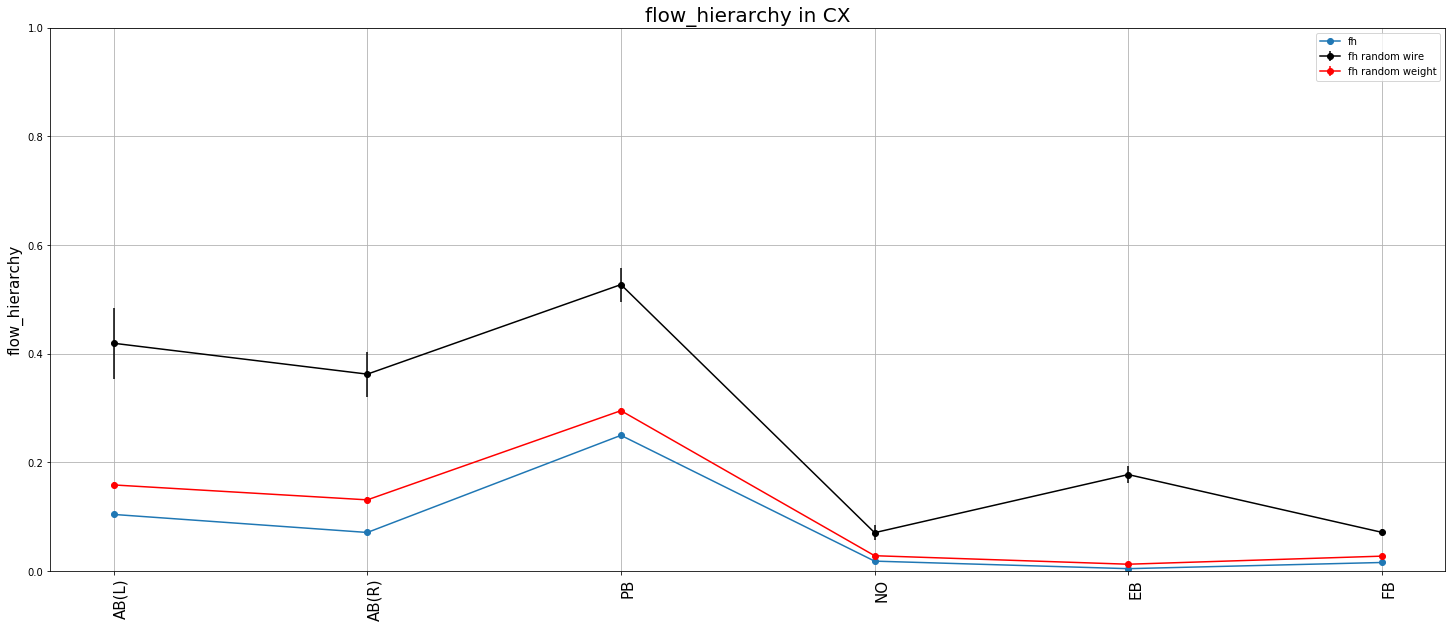

In [63]:
#plot flow_hierarchy

CX_rois = ['PB','NO','FB','EB','AB(L)','AB(R)']
res_sub = results_fh[results_fh['primary_roi'].isin(CX_rois)]
#plot_list = ['all_rois','df_rois','primary_rois','toplevel_rois','nonhierarchy_rois']
fig = plt.figure(figsize=(25,10))
#t = rois[plot_list].to_numpy()
#plt.imshow(t,cmap='gray')
plt.plot(res_sub['fh'].values,'o-',label='fh')
xs = [i for i in range(res_sub.shape[0])]
plt.errorbar(x=xs,y=res_sub['fh_randomwire_mean'],yerr=res_sub['fh_randomwire_std'],fmt='ko-',label='fh random wire')
plt.errorbar(x=xs,y=res_sub['fh_randomweight_mean'],yerr=res_sub['fh_randomweight_std'],fmt='ro-',label='fh random weight')
ax = fig._get_axes()[0]
ax.grid(b=True)
# for i in range(len(rois['combined_rois'])):
#     ax.axhline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
# for i in range(5):
#     ax.axvline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
# ax.set_aspect(1/5)
ax.set_ylabel('flow_hierarchy',fontsize=15)
ax.set_title('flow_hierarchy in CX',fontsize=20)
ax.set_xticks(xs)
ax.set_xticklabels(res_sub['primary_roi'],fontsize=15)
ax.set_ylim(0,1)
# ax.set_xticklabels([0]+plot_list,fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")
plt.legend()
plt.show()

<h3>primary_rois / neurons vs synapses</h3>

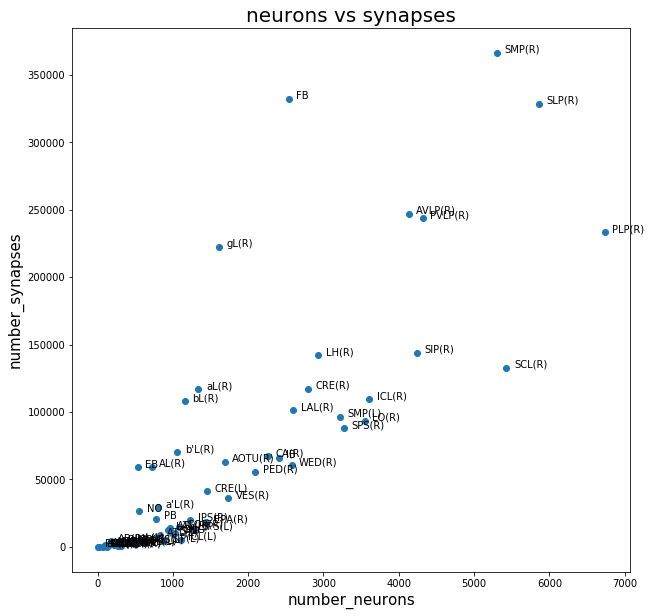

In [103]:
res = results.dropna().reset_index()

fig,axs = plt.subplots(figsize=(10,10))
plt.scatter(res['number_neurons'],res['number_synapses'])
ax = axs
z = res['number_neurons'].values
y = res['number_synapses'].values
ax.set_xlabel('number_neurons',fontsize=15)
ax.set_ylabel('number_synapses',fontsize=15)
ax.set_title('neurons vs synapses',fontsize=20)
for i, rec in res.iterrows():
    ax.annotate(rec['primary_roi'], (z[i]+100, y[i]+100))
plt.show()
#ax = fig._get_axes()[0]
#ax.set_aspect(1/50)

<h1>toplevel_rois</h1>

In [125]:
c = Client(conf.neuprint_URL, conf.dataset_version)


In [126]:
_, primary_rois, _, toplevel_rois = fetch_rois_from_metadata(client=c)


<h1>CX study</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import networkx as nx

from neuprint import Client, NeuronCriteria, fetch_adjacencies, fetch_roi_hierarchy, fetch_meta

from config import conf
from dataset_utils import fetch_adjacency, fetch_CX_datasets
from basic_metrics import indegree_mean,outdegree_mean

from fh.flow_hierarchy import hpy
from utils import conn2adj
from config import conf


In [2]:
c = Client(conf.neuprint_URL, conf.dataset_version)


In [4]:
_ = fetch_CX_datasets(client=c,include_nonprimary=True)

dataset in adjpath= datasets/noncropped_traced_CX
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_PB.NO.FB.EB.AB(L).AB(R)
dataset already downloaded


In [6]:
neur_CX_split,conn_CX_split = {}, {}
CX_rois = ['PB','NO','FB','EB','AB(L)','AB(R)']
for roi in CX_rois:
    n,conn = fetch_adjacency(adjpath='datasets/noncropped_traced_'+roi) 
    neur_CX_split[roi],conn_CX_split[roi] = n,conn
    
neur_CX_parts,conn_CX_parts = fetch_adjacency(adjpath='datasets/noncropped_traced_PB.NO.FB.EB.AB(L).AB(R)')
neur_CX,conn_CX = fetch_adjacency(adjpath='datasets/noncropped_traced_CX')

dataset in adjpath= datasets/noncropped_traced_PB
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_NO
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_FB
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_EB
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AB(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AB(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_PB.NO.FB.EB.AB(L).AB(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_CX
dataset already downloaded


In [10]:
for key in conn_CX_split.keys():
    print(key,conn_CX_split[key].shape[0])

PB 21026
NO 26287
FB 332510
EB 58908
AB(L) 1218
AB(R) 4016


In [13]:
CX_roistest = ['PB']
#hpy = lambda x: np.random.randn()
h_results = {'h':[],'h_randwire':[],'h_randweight':[]}
for roi in CX_roistest:
    print(roi)
    n,conn = fetch_adjacency(adjpath='datasets/noncropped_traced_'+roi)
    nmap,adj = conn2adj(conn)
    h_results['h'] += [hpy(adj)]
    
    N = adj.shape[0]
    perm = np.random.permutation(N)
    h_results['h_randwire'] += [hpy(adj[:, perm])]
    
    nonz = np.nonzero(adj)
    weights = adj[nonz]
    np.random.shuffle(weights)
    adj[nonz] = weights
    h_results['h_randweight'] += [hpy(adj)]
    

PB
dataset in adjpath= datasets/noncropped_traced_PB
dataset already downloaded


<h1>other</h1>

In [8]:
#establish relation roi -> main_roi

from neuprint import Client,fetch_roi_hierarchy

c = Client('neuprint.janelia.org', 'hemibrain:v1.1')
g = fetch_roi_hierarchy(mark_primary=False,include_subprimary=True,format='nx')

def find_main_roi(roi):
    pred = list(g.predecessors(roi))[0]
    if pred!='hemibrain':
        return find_main_roi(pred)
    else:
        return roi

df['main_roi'] = df['roi'].apply(func=find_main_roi)

NameError: name 'df' is not defined